In [28]:
def read_vehinj(vehinj_dir: Path) -> pd.DataFrame:
    veh = pd.read_csv(vehinj_dir / 'Vehicles2016_2019.csv',
                      parse_dates=['CreatedLOcalDateTime'],
                      usecols=['CreatedLOcalDateTime', 'EventID'],
                      dayfirst=True
                      )

    inj = pd.read_csv(vehinj_dir / 'Injuries2016_2019.csv',
                      parse_dates=['Created Local Date Time'],
                      usecols=['Created Local Date Time', 'Event Id'],
                      dayfirst=True
                      )

    veh = veh.rename(columns={'CreatedLOcalDateTime': 'time'})
    inj = inj.rename(columns={'Created Local Date Time': 'time',
                              'Event Id': 'EventID'})

    vehinj = pd.concat([veh, inj], sort=False).dropna()  # only 1 rec is nat
    vehinj['EventID'] = vehinj['EventID'].astype(int)

    return vehinj



In [44]:
from pathlib import Path
vehinj = read_vehinj(Path('../data/SANRAL_v2/'))

vehinj = vehinj.drop_duplicates(['EventID'])
u.add_more_time(vehinj)
vehinj['year'] = vehinj.time.dt.year

Time data was added.


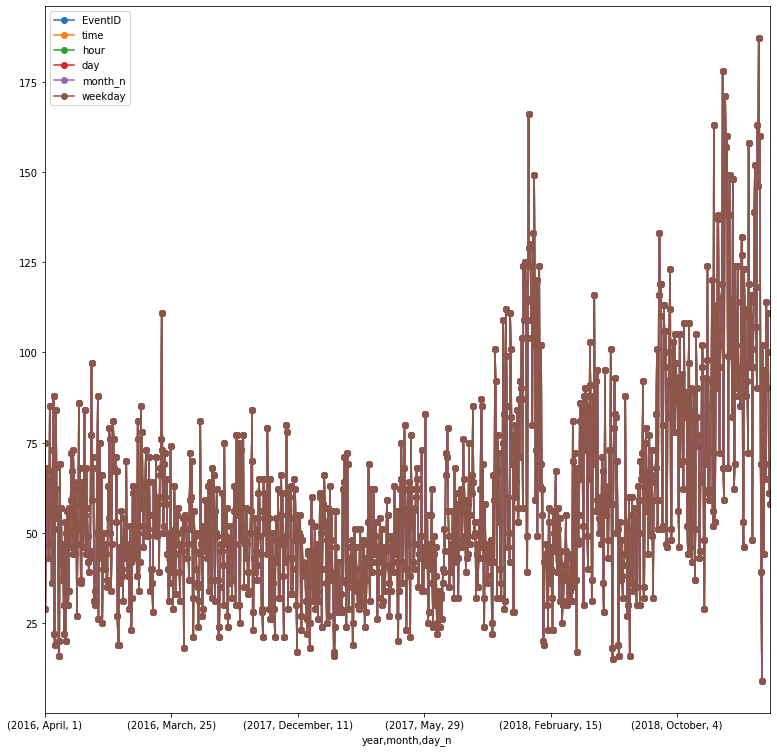

In [60]:
fig = plt.figure(figsize = (13,13))
ax = fig.gca()
    
vehinj.groupby(['year', 'month', 'day_n']).count().plot(marker='o', ax=ax)
plt.show()

In [43]:
# r = 0.14 / (1.09)
# p = 0.1135

# f = 2 * p * r / (p + r)

# print(f)

In [41]:
# ones = u.read_ones('../data/train.csv')
# u.add_more_time(ones)

# for y in '678':
#     print(len(u.select_by_time(ones, f'201{y}-01-01', f'201{y}-04-01')))

In [11]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from pathlib import Path
import src.utils as u
from tqdm.auto import tqdm
from collections import Counter
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 100)

u.random_seed(42)

data_path = Path('../data')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
train_full, test, all_cols, cont_cols, cat_cols = u.read_data(data_path)

In [ ]:
for f in cont_cols:
    test[f].fillna(0, inplace=True)
    train_full[f].fillna(0, inplace=True)

In [ ]:
val_start = '2018-10-01'

train = u.select_by_time(train_full, '2016-01-01', val_start, 'datetime')
val = u.select_by_time(train_full, val_start, '2018-12-31', 'datetime')

In [ ]:
clf = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=42, class_weight={0: 0.01, 1: 0.99})
clf.fit(train[cont_cols], train['y'])

In [ ]:
probas = clf.predict_proba(val[cont_cols])
u.f1_flexible(probas[:, 1], val['y'], 0, 0.99, 50)

In [ ]:
encoder = sklearn.preprocessing.OrdinalEncoder()

In [ ]:
encoder.fit_transform(X=val[cat_cols])

In [ ]:
encoder.transform(X=val[cat_cols])